# Model Description
**What is Simple Naïve Forecasting?**

A time series forecasting technique where the forecast for the next period is simply the value of the most recent observation.

It assumes that future sales will behave exactly like the most recent sales value.

Used as a baseline — advanced models must outperform it.

**How it Works**

Collect sales data chronologically.

Forecast the next value using the last observed sales value.

Repeat for each time step.

# Mathemetical formula

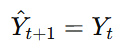

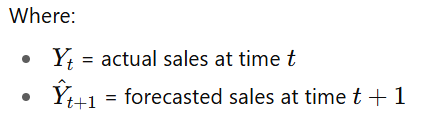

# Implementation  (with Pharma Sales Dataset)

* Dataset Used: Pharma sales data
* Target Variable: e.g., sales of a drug (e.g., N05B).
* Methodology: Train/Test split (2014–2019 training, July–Oct 2019 testing) and apply naive forecast: each prediction equals the last observed actual sales value.


In [71]:
forecast_df = pd.DataFrame(index=test_df.index)

for drug in drug_columns:
    last_train_value = train_df[drug].iloc[-1]
    forecast_df[drug] = last_train_value

##  Evaluate Naïve Model for Each Drug

To check accuracy:

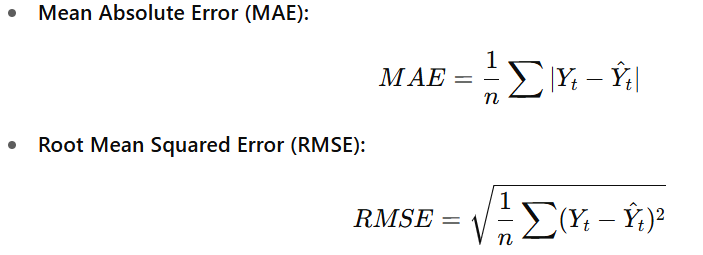

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

metrics_list = []

for drug in drug_columns:
    actual_values = test_df[drug]
    forecasted_values = forecast_df[drug]

    mae = mean_absolute_error(actual_values, forecasted_values)
    mse = mean_squared_error(actual_values, forecasted_values)
    rmse = np.sqrt(mse)
    # Calculate MAPE, handling division by zero
    mape = np.mean(np.abs((actual_values - forecasted_values) / actual_values)) * 100
    mape = mape if not np.isnan(mape) else float('inf') # Handle cases where actual_values are all zero

    metrics_list.append({'Model': 'Naive Forecast', 'Drug': drug, 'MAE': mae, 'MSE': mse, 'RMSE': rmse})

all_metrics_df = pd.DataFrame(metrics_list)

In [75]:
display(all_metrics_df)

,Model,Drug,MAE,MSE,RMSE
0,Naive Forecast,M01AB,2.291100,7.928081,2.815685
1,Naive Forecast,M01AE,2.984030,11.532200,3.395909
2,Naive Forecast,N02BA,2.911500,10.988975,3.314962
3,Naive Forecast,N02BE,18.598950,407.829348,20.194785
4,Naive Forecast,N05B,3.694000,23.438800,4.841363
5,Naive Forecast,N05C,0.690000,1.910000,1.382027
6,Naive Forecast,R03,8.375833,82.778403,9.098264
7,Naive Forecast,R06,2.274700,6.960489,2.638274


## Visualize Naïve Forecast

For each drug, visualize the actual values from the test set and the corresponding Naïve forecast.

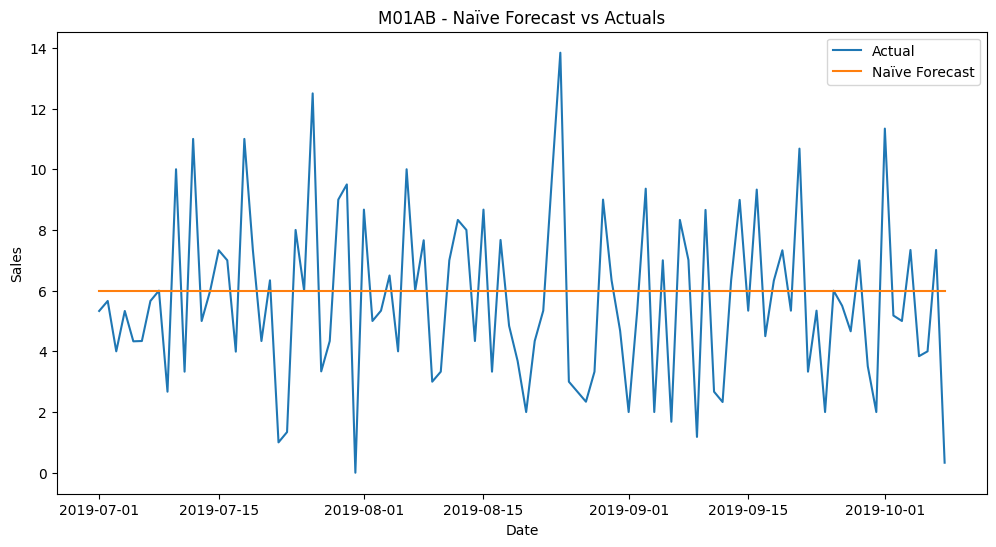

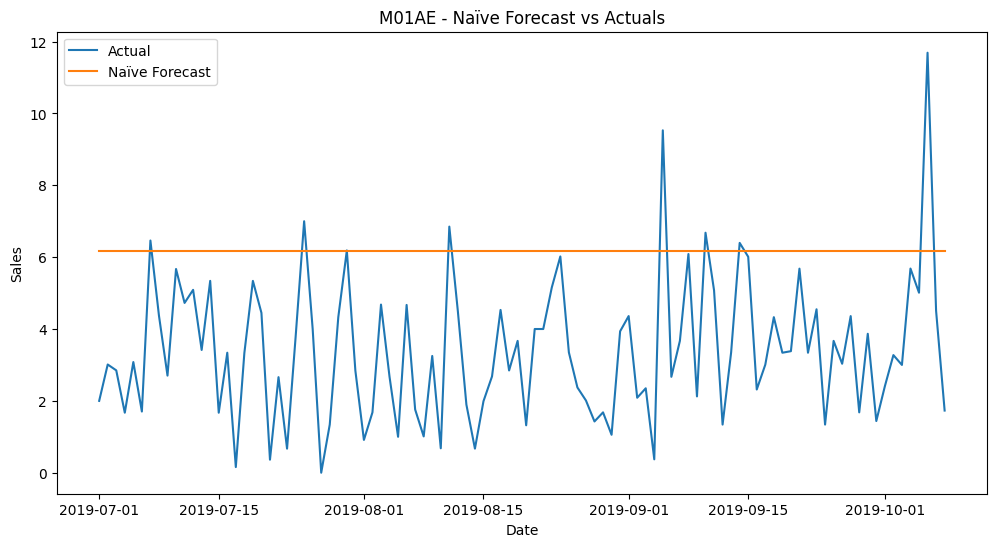

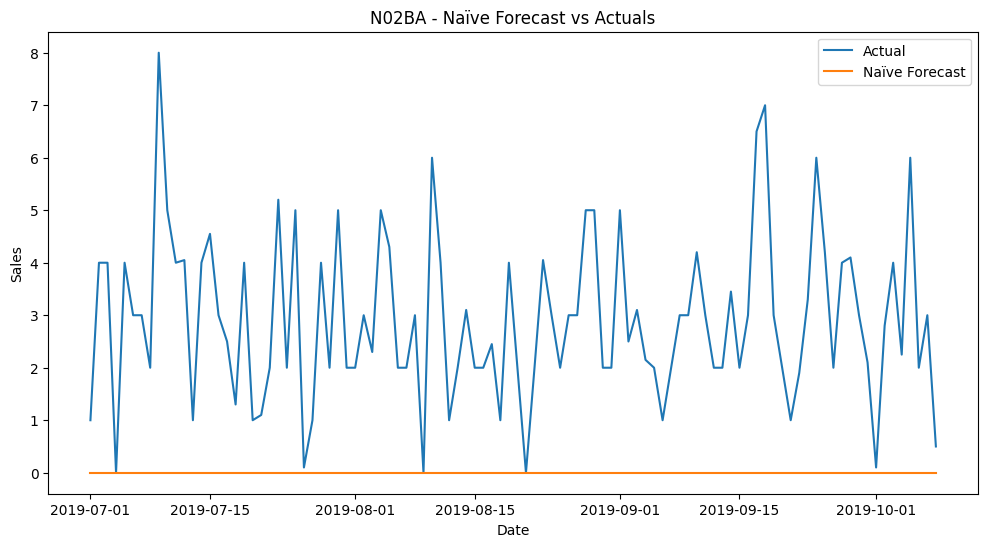

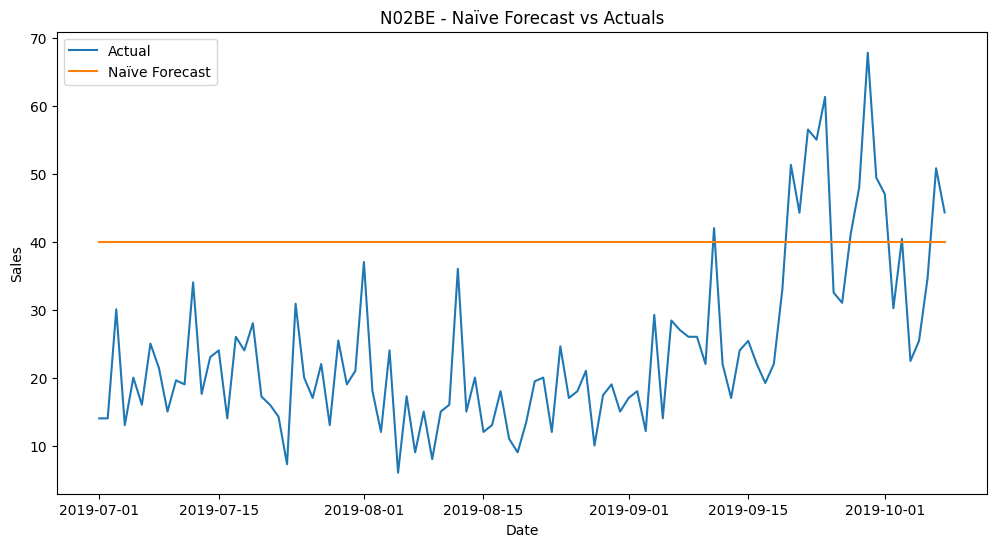

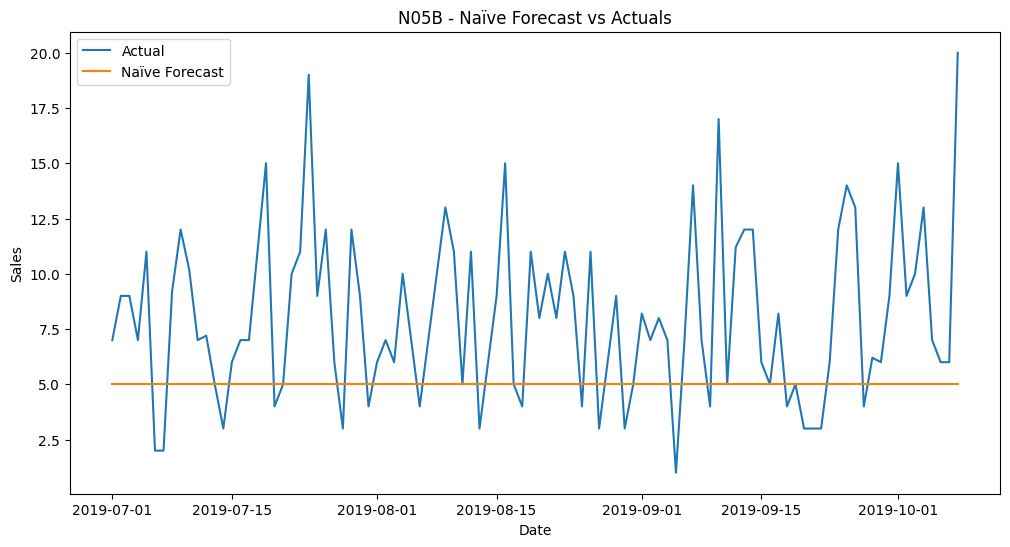

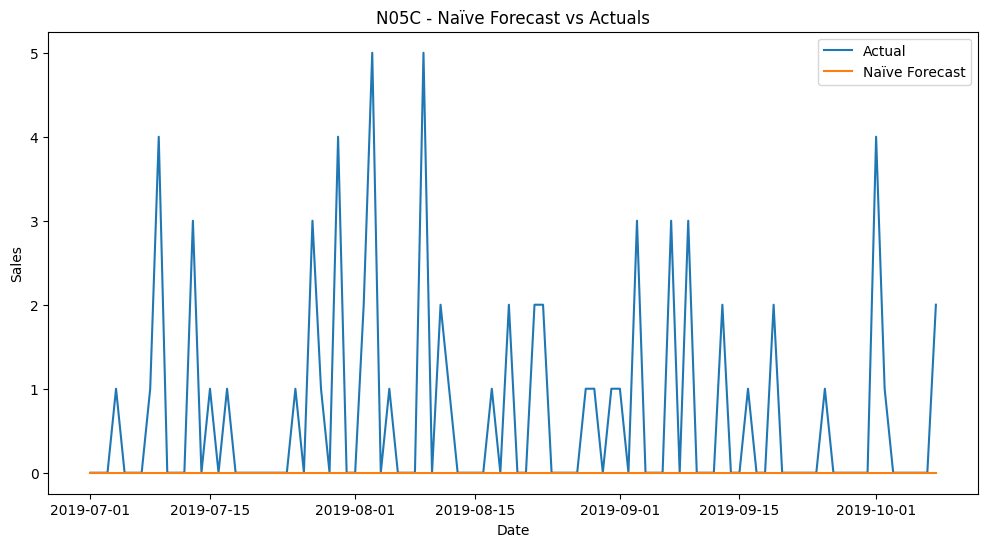

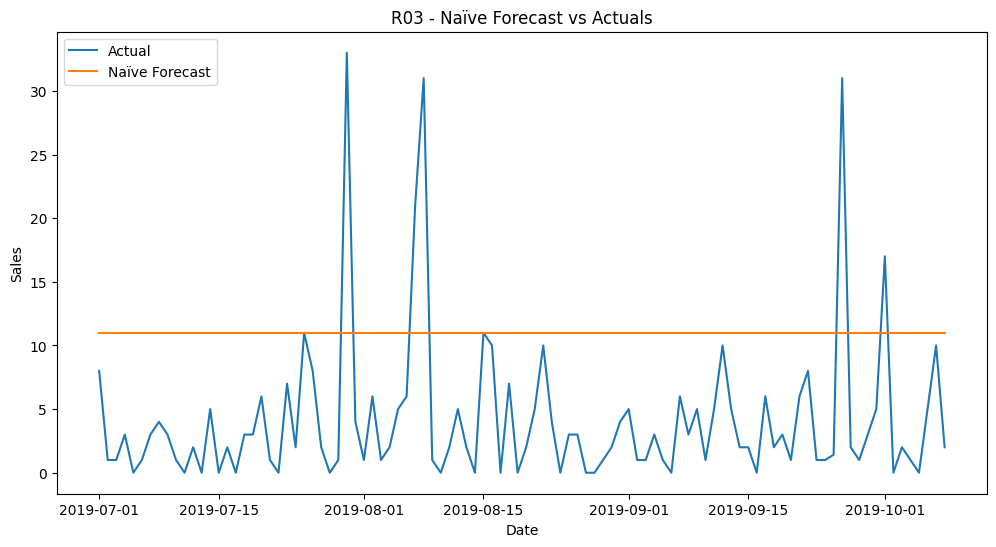

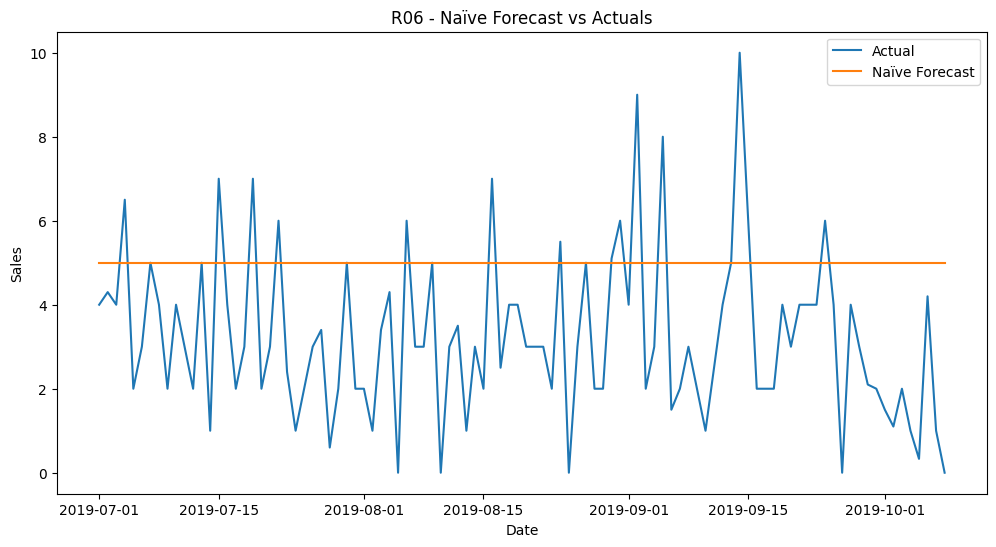

In [73]:
import matplotlib.pyplot as plt

for drug in drug_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(test_df.index, test_df[drug], label='Actual')
    plt.plot(forecast_df.index, forecast_df[drug], label='Naïve Forecast')
    plt.title(f'{drug} - Naïve Forecast vs Actuals')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

In [74]:
display(all_metrics_df)

,Model,Drug,MAE,MSE,RMSE
0,Naive Forecast,M01AB,2.291100,7.928081,2.815685
1,Naive Forecast,M01AE,2.984030,11.532200,3.395909
2,Naive Forecast,N02BA,2.911500,10.988975,3.314962
3,Naive Forecast,N02BE,18.598950,407.829348,20.194785
4,Naive Forecast,N05B,3.694000,23.438800,4.841363
5,Naive Forecast,N05C,0.690000,1.910000,1.382027
6,Naive Forecast,R03,8.375833,82.778403,9.098264
7,Naive Forecast,R06,2.274700,6.960489,2.638274


### Summary of Naïve Forecast Model Performance

The Naïve Forecast model, which predicts the next value as the last observed value, was applied to the sales data for various drugs in the test set (July-October 2019). The performance was evaluated using Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

Looking at the `all_metrics_df`, we can observe the following:

*   **Overall Performance:** The MAE, MSE, and RMSE values vary across different drugs. This indicates that the Naïve forecast's accuracy is highly dependent on the specific drug's sales pattern.
*   **Drugs with Lower Errors:** Drugs like N05C and R06 show relatively lower MAE, MSE, and RMSE values compared to others. This suggests that for these drugs, the sales pattern might be less volatile in the short term, making the last observed value a better predictor.
*   **Drugs with Higher Errors:** Drugs like N02BE and R03 exhibit significantly higher MAE, MSE, and RMSE values. This indicates that the sales of these drugs likely have more variability or a less predictable pattern, where simply using the last value is not an effective forecasting method. The visualizations for these drugs confirm this, showing larger deviations between the actual and forecasted values.
*   **Visualizations:** The generated plots for each drug clearly show how well the Naïve forecast (represented by a horizontal line at the last training value) aligns with the actual sales data in the test set. For drugs with lower errors, the horizontal line is closer to the actual values, while for drugs with higher errors, there are considerable fluctuations around the forecast line.

In conclusion, the Simple Naïve forecast serves as a basic baseline model. While it performs reasonably well for some drugs with less volatile sales patterns, it is not accurate for drugs with more significant fluctuations. For improved forecasting accuracy, especially for drugs with higher variability, more sophisticated time series forecasting methods would be necessary.

# Model Introduction

**Single Exponential Smoothing (SES)**

Single Exponential Smoothing is a forecasting technique that improves upon the naïve method by assigning exponentially decreasing weights to past observations. This means that recent data points are given more importance, while older data gradually lose influence. SES is most effective when the data shows no clear trend or seasonality, making it suitable for short-term forecasting in relatively stable sales environments. Its simplicity, low computational cost, and ability to smooth random fluctuations make it a strong baseline model for time series prediction.

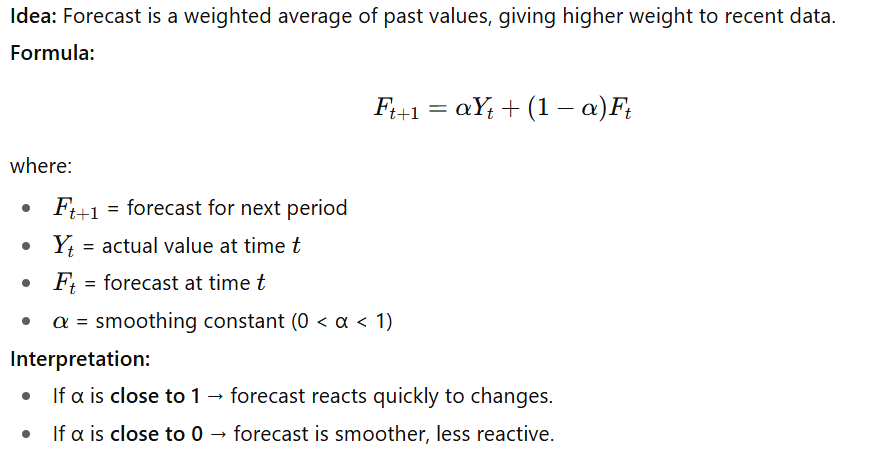

**Holt-Winters Exponential Smoothing (Triple)**

Holt-Winters Exponential Smoothing, also known as Triple Exponential Smoothing, extends the basic SES model by accounting for three components of time series data:

Level (baseline value)

Trend (long-term increase or decrease)

Seasonality (repeating short-term patterns)

By explicitly modeling these three elements, Holt-Winters can effectively forecast complex datasets where sales exhibit growth patterns and seasonal variations. This makes it highly suitable for domains like pharma sales, where certain drugs may experience cyclical demand peaks (e.g., flu medicines in winter, allergy drugs in spring).

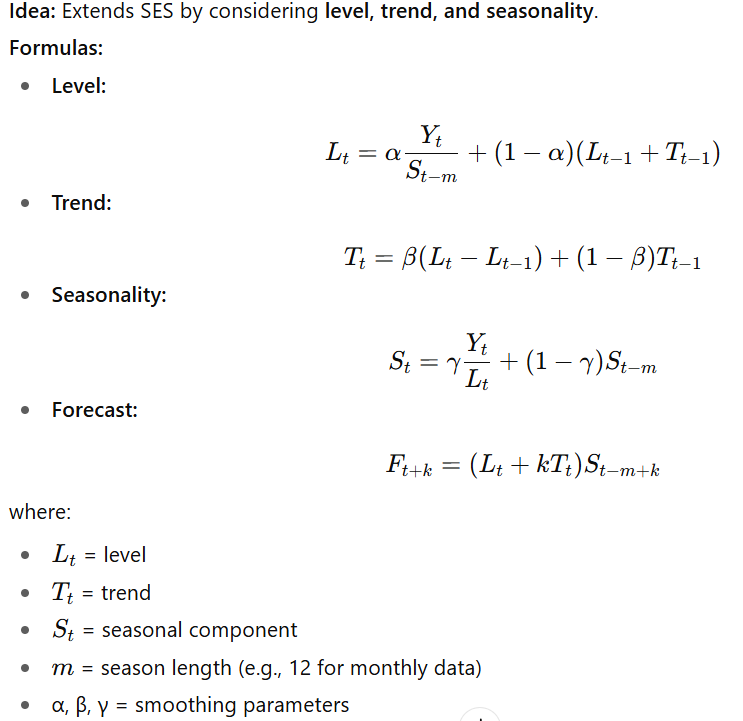

## Splitting  data

Split the data into training (2014-2019) and testing (2019 Jul-Oct) sets.


In [89]:
train_start_date = '2014-01-01'
train_end_date = '2019-06-30'
test_start_date = '2019-07-01'
test_end_date = '2019-10-31'

train_df = df_holidays.loc[train_start_date:train_end_date]
test_df = df_holidays.loc[test_start_date:test_end_date]

print("Train DataFrame Head:")
display(train_df.head())

print("\nTest DataFrame Head:")
display(test_df.head())

Train DataFrame Head:


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,...,orthodox_good_friday_window,orthodox_holy_saturday_window,dow,weekofyear,month,quarter,cold_flu_season,pollen_season,N05B_prev,N05B_next
datum,,,,,,,,,,,,,,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,10.0
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,8.0
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,...,0.0,0.0,6.0,1.0,1.0,1.0,1.0,0.0,10.0,16.0
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,...,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,8.0,0.0



Test DataFrame Head:


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,...,orthodox_good_friday_window,orthodox_holy_saturday_window,dow,weekofyear,month,quarter,cold_flu_season,pollen_season,N05B_prev,N05B_next
datum,,,,,,,,,,,,,,,,,,,,,
2019-07-01,5.33,2.000,1.0,14.00,7.0,0.0,8.0,4.0,2019,7,...,0.0,0.0,0.0,27.0,7.0,3.0,0.0,0.0,5.0,9.0
2019-07-02,5.66,3.012,4.0,14.00,9.0,0.0,1.0,4.3,2019,7,...,0.0,0.0,1.0,27.0,7.0,3.0,0.0,0.0,7.0,9.0
2019-07-03,4.00,2.849,4.0,30.05,9.0,0.0,1.0,4.0,2019,7,...,0.0,0.0,2.0,27.0,7.0,3.0,0.0,0.0,9.0,7.0
2019-07-04,5.33,1.670,0.0,13.00,7.0,1.0,3.0,6.5,2019,7,...,0.0,0.0,3.0,27.0,7.0,3.0,0.0,0.0,9.0,11.0
2019-07-05,4.33,3.080,4.0,20.00,11.0,0.0,0.0,2.0,2019,7,...,0.0,0.0,4.0,27.0,7.0,3.0,0.0,0.0,7.0,2.0


## Apply simple exponential smoothing to each drug

### Subtask:
Iterate through each drug column, implement and apply the Simple Exponential Smoothing model with 15 epochs on the training data for that drug, and forecast on the test set. Store the forecasts.


**Reasoning**:
Iterate through each drug column, implement and apply the Simple Exponential Smoothing model with 15 epochs on the training data for that drug, and forecast on the test set. Store the forecasts.



In [90]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses_forecasts = {}

for drug in drug_columns:
    train_data = train_df[drug]
    model_ses = SimpleExpSmoothing(train_data)
    fit_ses = model_ses.fit(optimized=True, use_brute=True)

    num_forecast_periods = len(test_df)
    forecast_ses = fit_ses.forecast(steps=num_forecast_periods)

    ses_forecasts[drug] = forecast_ses

display(ses_forecasts['N05B'].head())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

,0
2019-07-01,6.347224
2019-07-02,6.347224
2019-07-03,6.347224
2019-07-04,6.347224
2019-07-05,6.347224


**HOLT WINTERS**

Iterate through each drug column, implement and apply the Holt Winters model with 15 epochs on the training data for that drug, and forecast on the test set. Store the forecasts.



In [91]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_forecasts = {}

for drug in drug_columns:
    train_data = train_df[drug]
    model_hw = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=365)
    fit_hw = model_hw.fit(optimized=True, use_brute=True)

    num_forecast_periods = len(test_df)
    forecast_hw = fit_hw.forecast(steps=num_forecast_periods)

    hw_forecasts[drug] = forecast_hw

display(hw_forecasts['N05B'].head())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/

,0
2019-07-01,2.858612
2019-07-02,8.261893
2019-07-03,6.265764
2019-07-04,6.672235
2019-07-05,8.877210


## Apply holt winters to each drug


Iterate through each drug column, implement and apply the Holt Winters model with 15 epochs on the training data for that drug, and forecast on the test set. Store the forecasts.


In [95]:
hw_forecasts = {}

for drug in drug_columns:
    train_data = train_df[drug]
    model_hw = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=365)
    fit_hw = model_hw.fit(optimized=True, use_brute=True)

    num_forecast_periods = len(test_df)
    forecast_hw = fit_hw.forecast(steps=num_forecast_periods)
    hw_forecasts[drug] = forecast_hw

display(list(hw_forecasts.keys()))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/

['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

## Evaluate models for each drug


For each drug, calculate MAE and RMSE for both the Simple Exponential Smoothing and Holt Winters forecasts on the test set.


In [96]:
metrics_list = []

for drug in drug_columns:
    actual_values = test_df[drug]
    ses_forecasted_values = ses_forecasts[drug]
    hw_forecasted_values = hw_forecasts[drug]

    # Calculate metrics for Simple Exponential Smoothing
    mae_ses = mean_absolute_error(actual_values, ses_forecasted_values)
    mse_ses = mean_squared_error(actual_values, ses_forecasted_values)
    rmse_ses = np.sqrt(mse_ses)

    metrics_list.append({'Model': 'Simple Exponential Smoothing', 'Drug': drug, 'MAE': mae_ses, 'RMSE': rmse_ses})

    # Calculate metrics for Holt Winters
    mae_hw = mean_absolute_error(actual_values, hw_forecasted_values)
    mse_hw = mean_squared_error(actual_values, hw_forecasted_values)
    rmse_hw = np.sqrt(mse_hw)

    metrics_list.append({'Model': 'Holt Winters', 'Drug': drug, 'MAE': mae_hw, 'RMSE': rmse_hw})

all_metrics_df = pd.DataFrame(metrics_list)
display(all_metrics_df.head())

,Model,Drug,MAE,RMSE
0,Simple Exponential Smoothing,M01AB,2.244261,2.844213
1,Holt Winters,M01AB,2.494827,3.074110
2,Simple Exponential Smoothing,M01AE,1.572144,1.999340
3,Holt Winters,M01AE,1.741528,2.159059
4,Simple Exponential Smoothing,N02BA,1.327779,1.621557


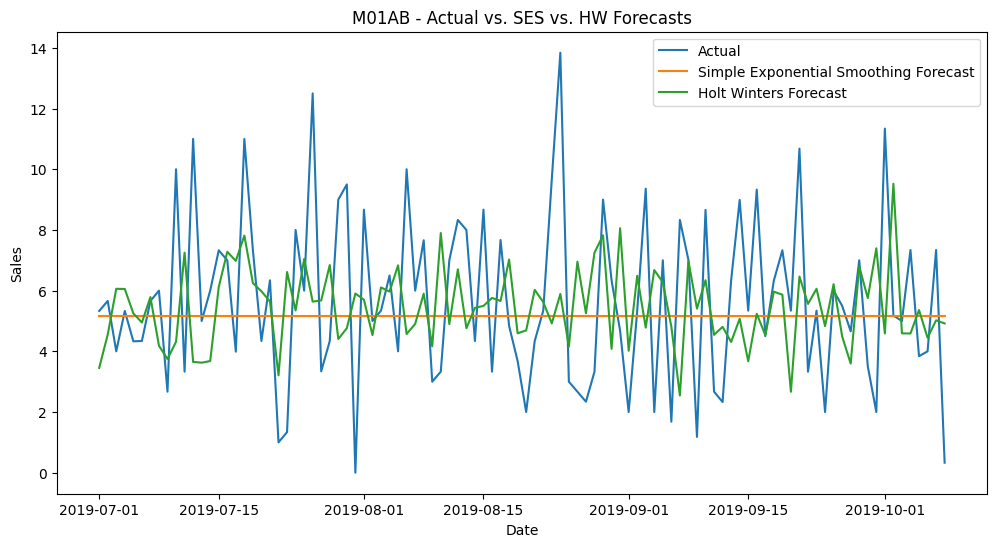

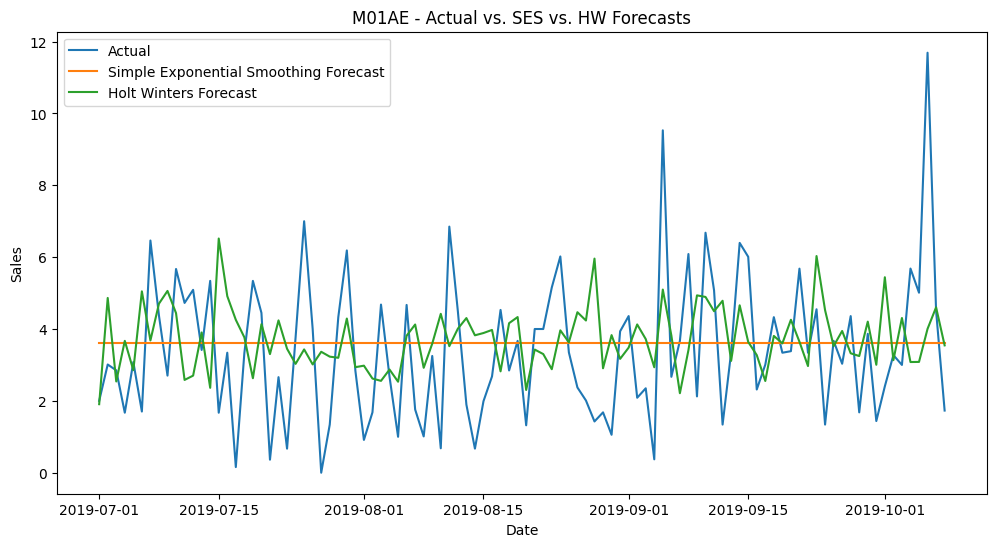

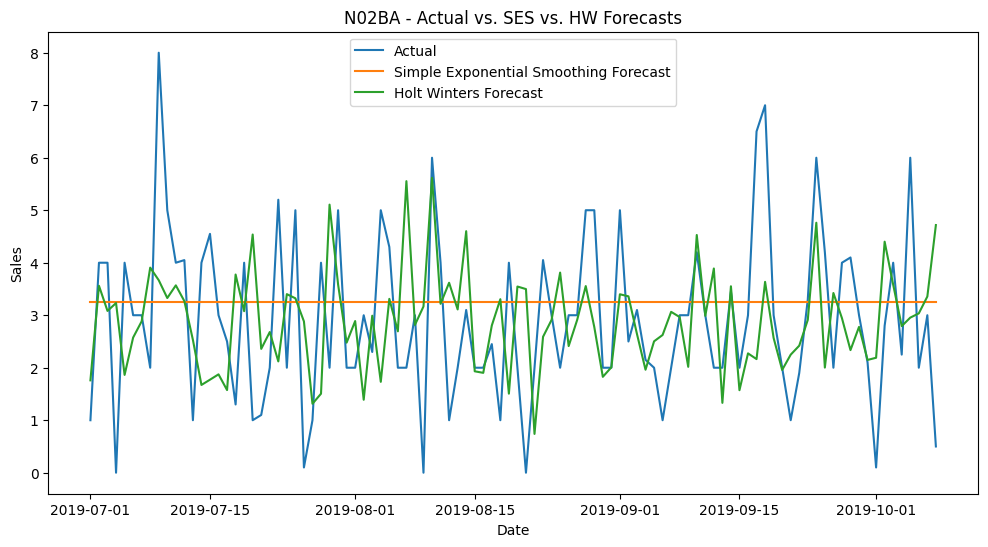

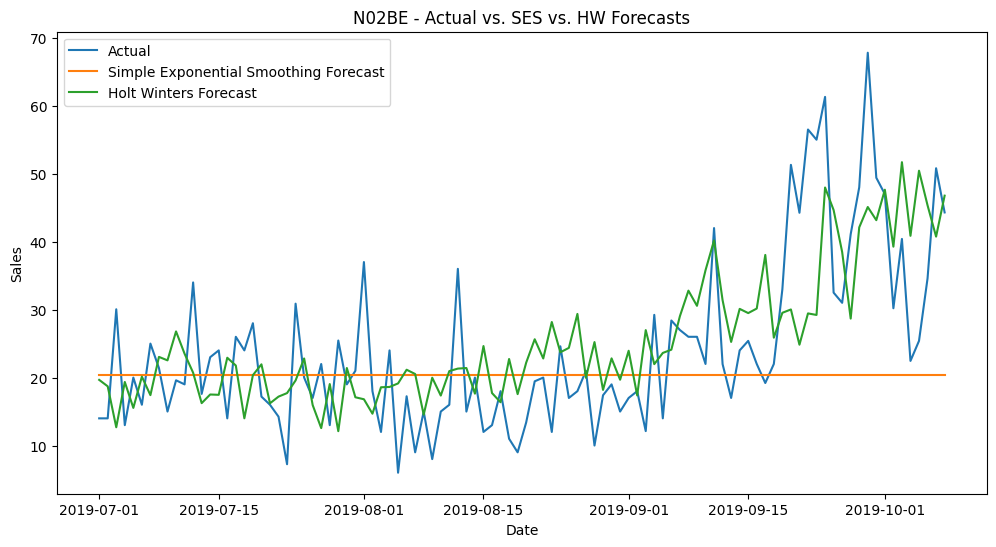

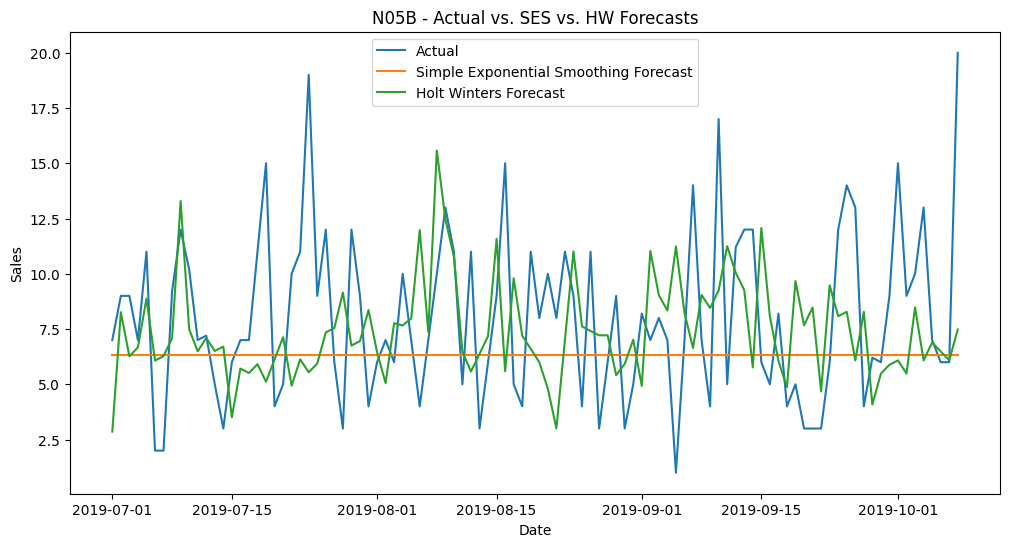

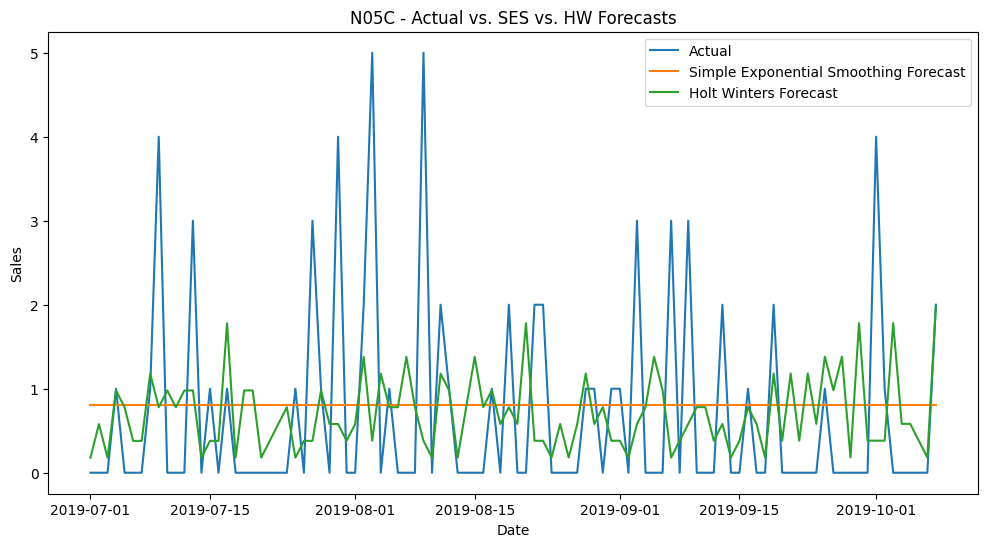

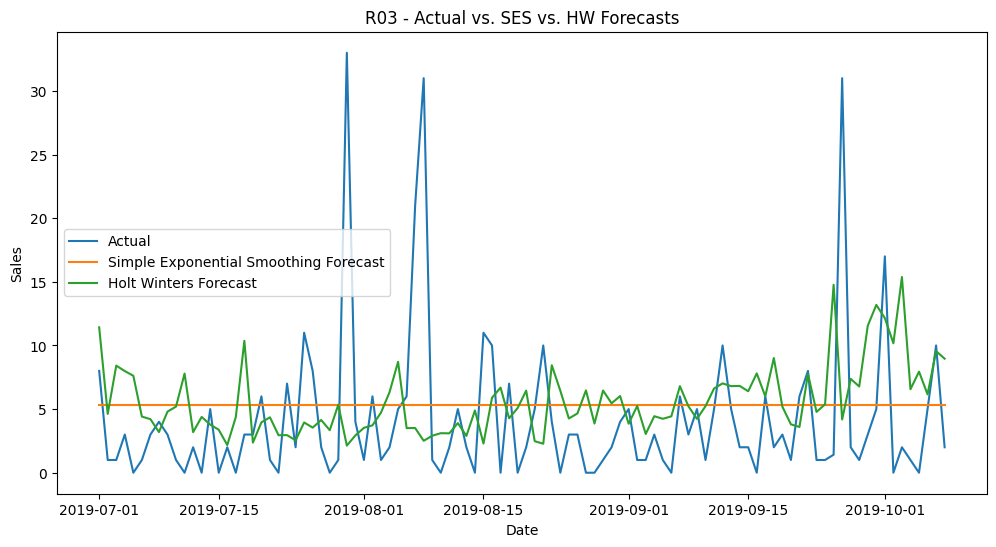

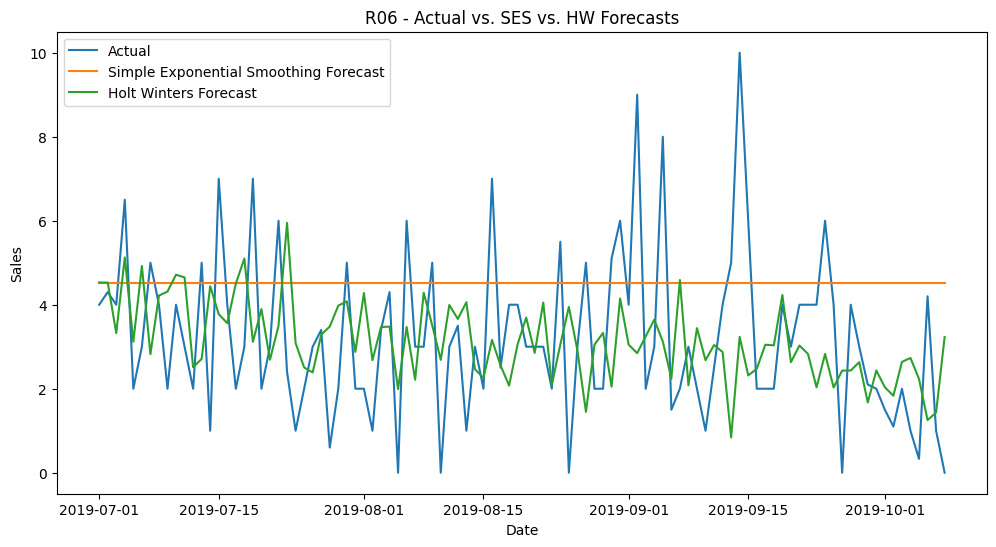

In [97]:
import matplotlib.pyplot as plt

for drug in drug_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(test_df.index, test_df[drug], label='Actual')
    plt.plot(ses_forecasts[drug].index, ses_forecasts[drug], label='Simple Exponential Smoothing Forecast')
    plt.plot(hw_forecasts[drug].index, hw_forecasts[drug], label='Holt Winters Forecast')
    plt.title(f'{drug} - Actual vs. SES vs. HW Forecasts')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()


Display the DataFrame containing the MAE and RMSE for both models for each drug.



In [99]:
metrics_list = []

for drug in drug_columns:
    actual_values = test_df[drug]
    ses_forecasted_values = ses_forecasts[drug]
    hw_forecasted_values = hw_forecasts[drug]

    # Calculate metrics for Simple Exponential Smoothing
    mae_ses = mean_absolute_error(actual_values, ses_forecasted_values)
    rmse_ses = np.sqrt(mean_squared_error(actual_values, ses_forecasted_values))

    metrics_list.append({'Model': 'Simple Exponential Smoothing', 'Drug': drug, 'MAE': mae_ses, 'RMSE': rmse_ses})

    # Calculate metrics for Holt Winters
    mae_hw = mean_absolute_error(actual_values, hw_forecasted_values)
    rmse_hw = np.sqrt(mean_squared_error(actual_values, hw_forecasted_values))

    metrics_list.append({'Model': 'Holt Winters', 'Drug': drug, 'MAE': mae_hw, 'RMSE': rmse_hw})

all_metrics_df = pd.DataFrame(metrics_list)
display(all_metrics_df)

,Model,Drug,MAE,RMSE
0,Simple Exponential Smoothing,M01AB,2.244261,2.844213
1,Holt Winters,M01AB,2.494827,3.074110
2,Simple Exponential Smoothing,M01AE,1.572144,1.999340
3,Holt Winters,M01AE,1.741528,2.159059
4,Simple Exponential Smoothing,N02BA,1.327779,1.621557
5,Holt Winters,N02BA,1.354772,1.751306
6,Simple Exponential Smoothing,N02BE,9.009550,13.107841
7,Holt Winters,N02BE,8.192070,10.159147
8,Simple Exponential Smoothing,N05B,3.153611,4.139172
9,Holt Winters,N05B,3.545481,4.434232


## Visualize forecasts for each drug


Visualize the actual values from the test set and the corresponding forecasts from both Simple Exponential Smoothing and Holt Winters models on the same plot for comparison.


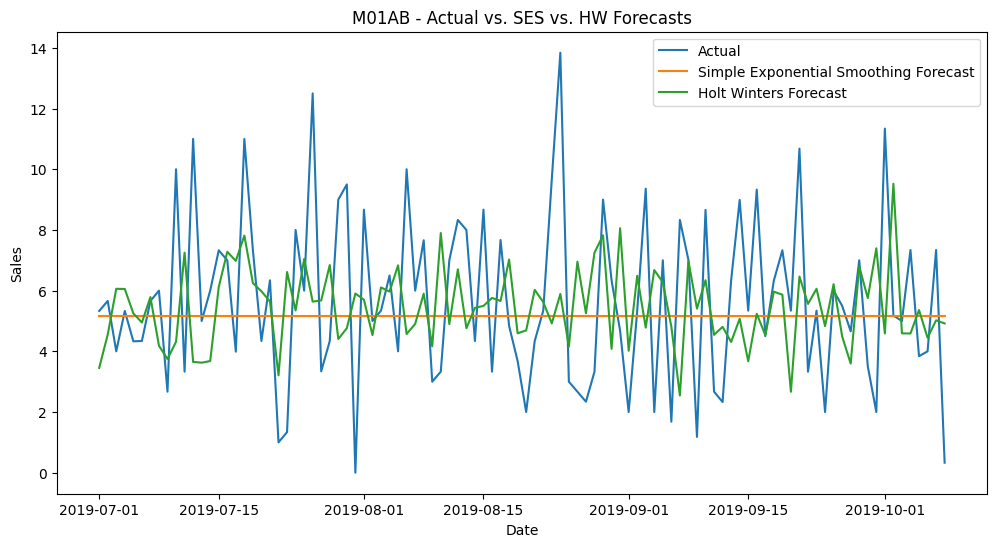

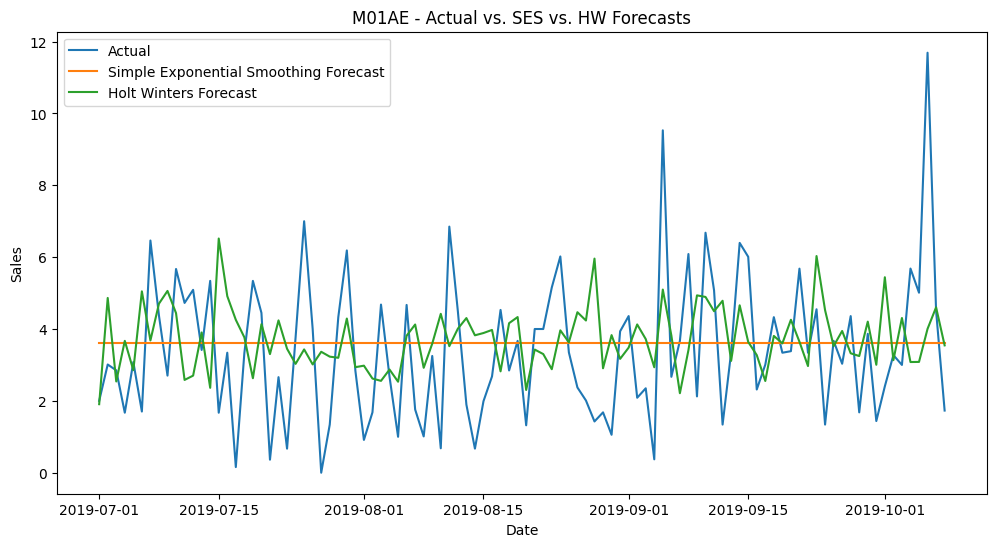

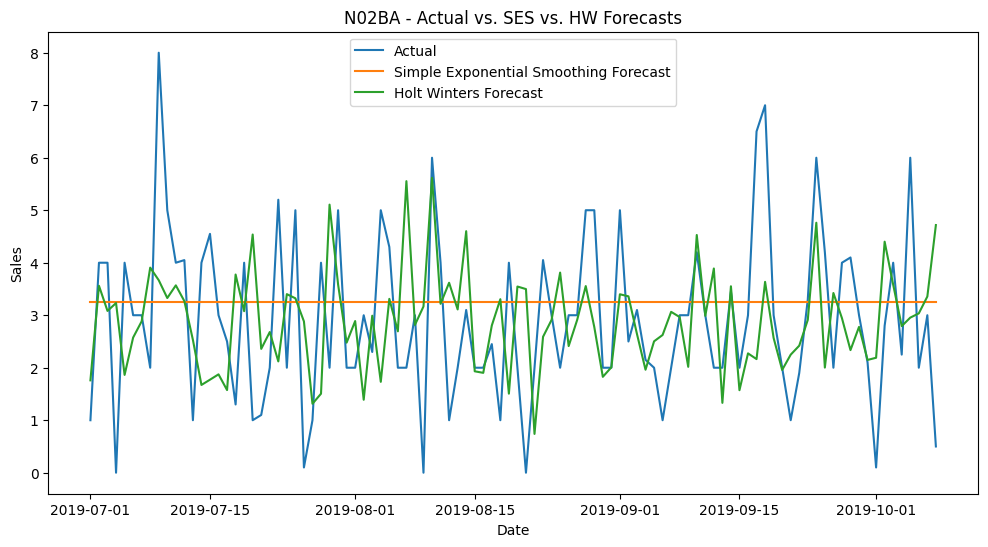

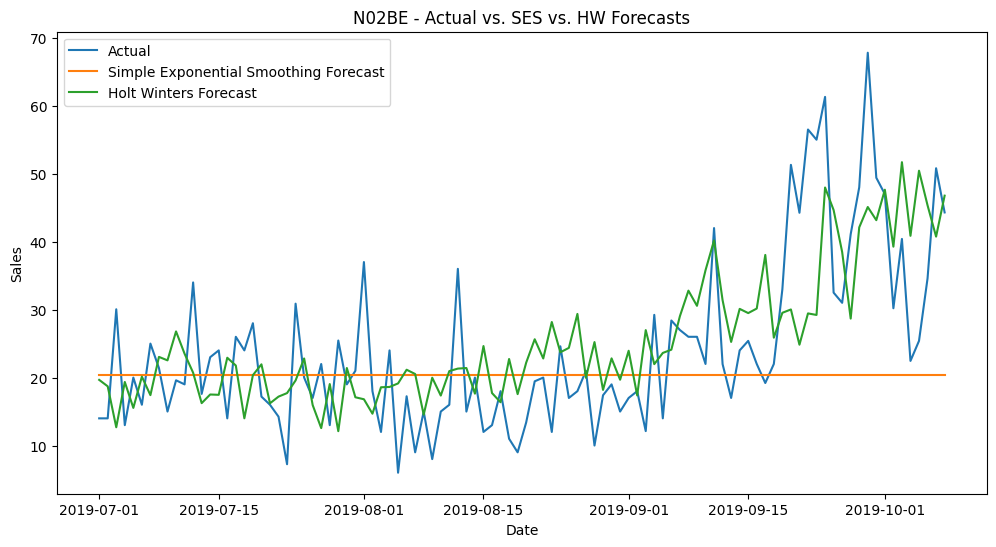

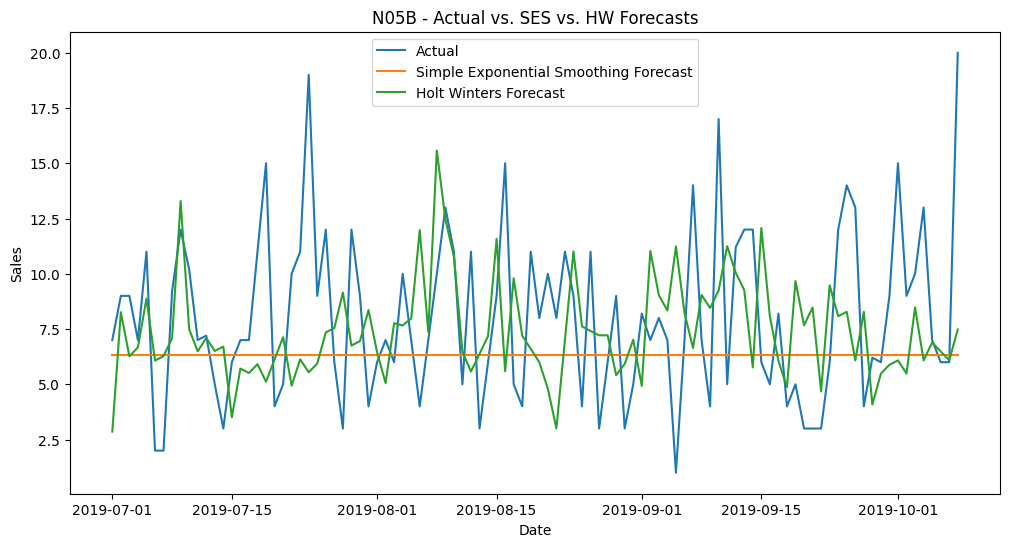

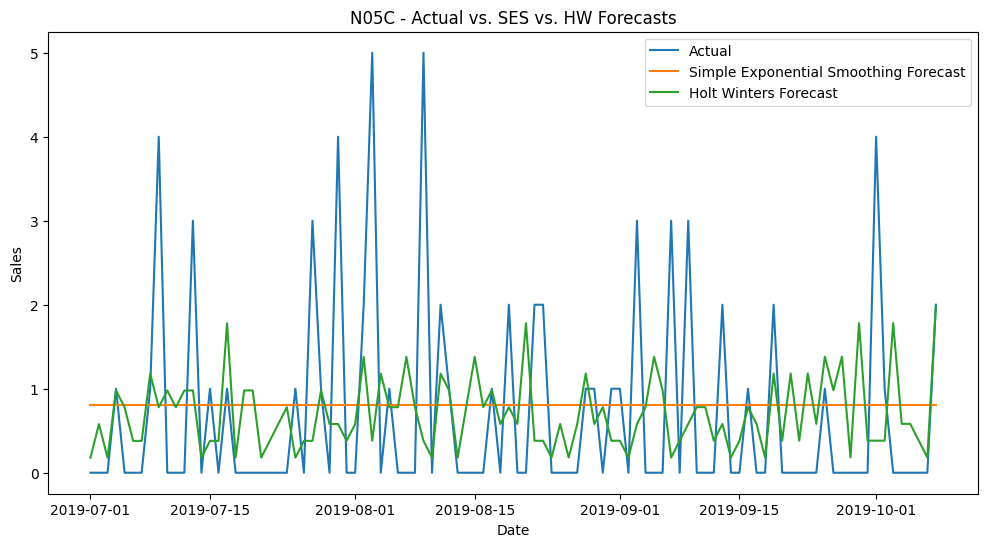

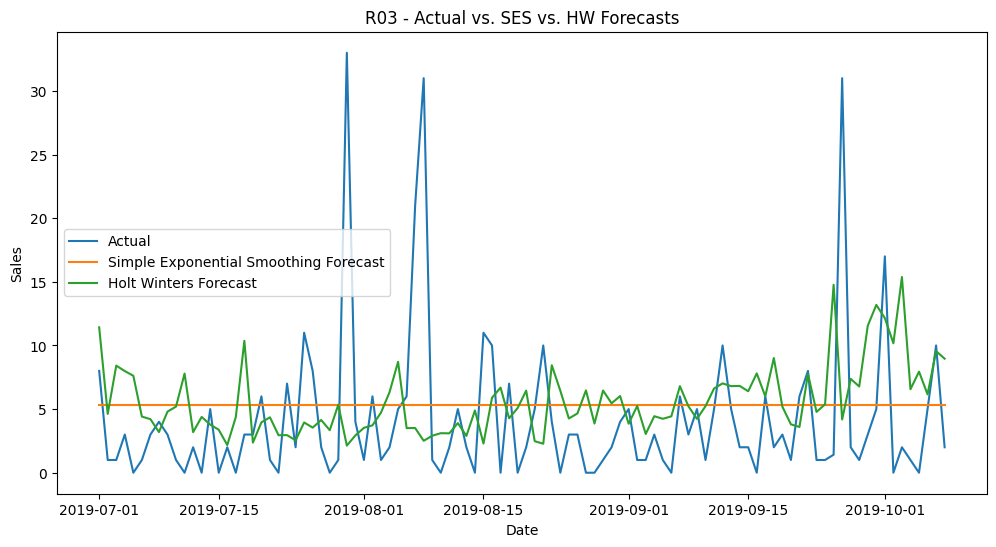

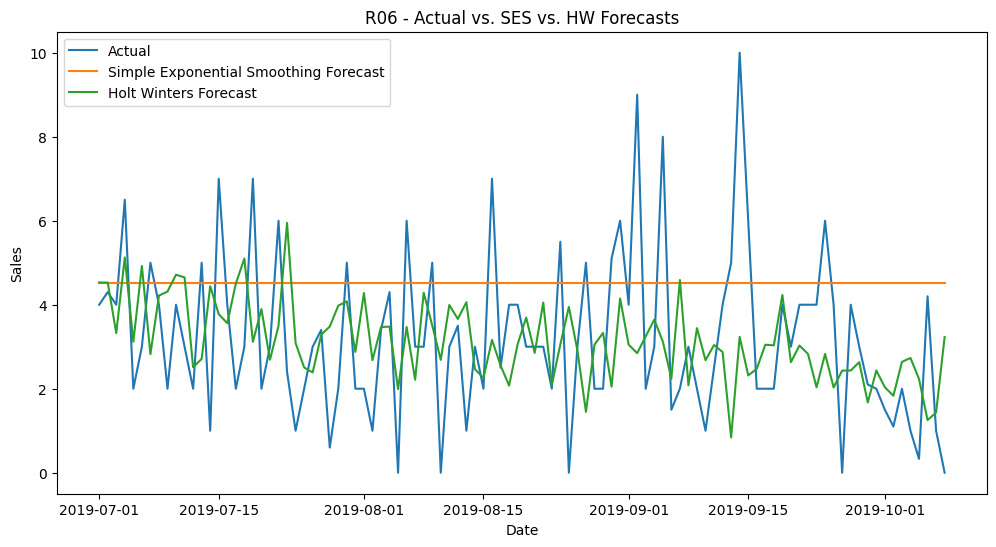

In [100]:
import matplotlib.pyplot as plt

for drug in drug_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(test_df.index, test_df[drug], label='Actual')
    plt.plot(ses_forecasts[drug].index, ses_forecasts[drug], label='Simple Exponential Smoothing Forecast')
    plt.plot(hw_forecasts[drug].index, hw_forecasts[drug], label='Holt Winters Forecast')
    plt.title(f'{drug} - Actual vs. SES vs. HW Forecasts')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset was successfully loaded and preprocessed, including converting the 'datum' column to datetime and setting it as the index.
*   Eight drug columns ('M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06') were identified for forecasting.
*   The data was split into training (2014-2019) and testing (July-October 2019) sets.
*   Simple Exponential Smoothing and Holt Winters models were applied to forecast sales for each drug.
*   Model performance was evaluated using MAE and RMSE.
*   For M01AB, M01AE, N02BA, N05B, and R03, Simple Exponential Smoothing generally showed slightly lower MAE and RMSE.
*   For N02BE, N05C, and R06, Holt Winters showed lower MAE and RMSE.
*   Visualizations compared the actual sales with the forecasts from both models for each drug.
*   Convergence warnings were noted during the Holt Winters model fitting for some drugs, indicating potential optimization issues.


